# Monte Carlo Simulation

### Two-Level Systems
두 개의 에너지 상태($E_x=E, E_y=-E$)를 가지는 서로 독립적인 입자 $N$개가 있다. 개별 입자가 에너지 $E$인 상태로 존재할 확률은 다음처럼 주어진다. 
$$P_x=\frac{1}{Z}e^{-\beta E}, \quad P_y=\frac{1}{Z}e^{+\beta E},$$
여기에서 분배함수 $Z$는 다음과 같다.
$$Z=e^{-\beta E}+e^{+\beta E}.$$
만약 우리가 분배함수를 구할 수 있다면 열역학적 변수들을 모두 구할 수 있다. 하지만 분배함수를 구하기 위해서는 가능한 모든 상태들의 정보가 필요하므로 일반적으로 이 과정은 매우 어렵다. 다행히 몬테카를로 방법을 이용하면 분배함수 없이 $P$를 구할 수 있다. 이를 마르코프 체인(Markov Chain) 혹은 마르코프 체인 몬테카를로 방법이라고 부르기도 한다. 

### Metropolis Algorithm

평형상태에서 확률을 구하는 것이 목표이므로 다음 조건을 만족하는 확률 $P$를 찾으면 된다.
$$P_x T(x \rightarrow y) = P_y T(y \rightarrow x).$$
여기에서 $T(x \rightarrow y)$는 상태 $x$에서 $y$로 전이확률을 의미한다. 위 식을 다시 정리하면
$$\frac{ T(x \rightarrow y)}{T(y \rightarrow x)} = \frac{P_y}{P_x}=\frac{e^{-\beta E_y}/Z}{e^{-\beta E_x}/Z}=e^{-\beta(E_y-E_x)}.$$
위의 식에서 분배함수가 소거되어서 없다는 사실을 확인하여라. 만일 다음을 만족하는 전이확률을 구하고 이 전이확률에 따라 충분히 오랜 시간동안 확률이 변화하면 최종적으로 볼츠만 분포에 도달한다.

이제 남은 과제는 전이확률 $T$를 구하는 것이다. 위의 조건을 만족하는 전이확률은 유일하게 정의되지 않는다. 매우 다양한 가능성이 존재하며 그 중에서 간단하며 흔히 많이 사용되는 메트로폴리스 방법에 대해서 살펴보자. 위의 조건을 만족하는 전이확률을 찾기만 하면 되므로 다음처럼 확률을 구성하자.
$E_x>E_y$인 상태에 대해서
$$T(y\rightarrow x)=e^{-\beta (E_y - E_x)}, \quad T(x\rightarrow y)=1. $$
위의 식처럼 주어지는 전이확률이 위의 조건을 자명하게 만족한다는 사실을 확인할 수 있다. 이러한 전이확률을 구현하기 위해서 다음의 과정을 거친다.

1. $N$개의 입자 중에 무작위로 하나를 고른다. 고른 입자를 $i$라고 부르자.
2. 입자 $i$의 상태와 에너지를 확인한다. 이를 $E_x$이라고 하자.
3. 입자의 상태를 변화했을 때 에너지를 확인하자. 이를 $E_y$라고 하고 에너지 차이를 구한다. $\Delta E=E_y-E_x$
4. 만약 $\Delta E \le 0$이면 1의 확률로(즉 항상) 상태를 $x$에서 $y$로 바꾼다.
5. 만약 $\Delta E > 0$이면 $e^{-\beta \Delta E}$의 확률로 상태를 $y$로 바꾼다. 즉 0과 1사이의 랜덤넘버를 하나 구해서 이 값이 앞의 확률보다 낮으면 상태를 바꾼다.
6. 평형상태에 도달할 때까지 이 과정을 충분히 오래 반복한다.

In [19]:
import random
import numpy as np
import matplotlib.pyplot as plt 

# N=1000, beta=1
def aveE(b,n):
    states = np.ones(n)
    for t in range(n*100):
        i=random.randint(0,n-1)
        DE = -2*states[i]
        if DE<0:
            states[i]=-1*states[i] # 상태 바꾸기 1 -> -1 or -1 -> 1
        elif random.random()<np.exp(-b*DE):
            states[i]=-1*states[i]
    return sum(states)

In [20]:
temp=np.arange(1,20,2)
y=[aveE(1/t,1000) for t in temp]

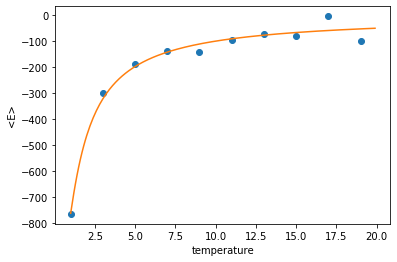

In [27]:
b=np.arange(1,20,0.1)
th=-1000*np.tanh(1/b)

plt.xlabel('temperature')
plt.ylabel('<E>')
plt.plot(temp,y,'o')
plt.plot(b,th);